[2703684.0, 209270.0, 116763.0, 78171.0]
[1694709.0, 447670.0, 447436.0, 447195.0]
[4398393.0, 656940.0, 564199.0, 525366.0]
[2703684.0, 348063.0, 196099.0, 131764.0]
[1694709.0, 767777.0, 767374.0, 767002.0]
[4398393.0, 1115840.0, 963473.0, 898766.0]
[2703684.0, 507546.0, 296159.0, 204539.0]
[1694709.0, 1056508.0, 1055931.0, 1055428.0]
[4398393.0, 1564054.0, 1352090.0, 1259967.0]
[2703684.0, 646278.0, 394941.0, 282168.0]
[1694709.0, 1249562.0, 1248856.0, 1248266.0]
[4398393.0, 1895840.0, 1643797.0, 1530434.0]
[2703684.0, 869937.0, 566566.0, 422519.0]
[1694709.0, 1461604.0, 1460691.0, 1459941.0]
[4398393.0, 2331541.0, 2027257.0, 1882460.0]
[2703684.0, 1053706.0, 709119.0, 540014.0]
[1694709.0, 1552845.0, 1551775.0, 1550930.0]
[4398393.0, 2606551.0, 2260894.0, 2090944.0]
[[2703684.0, 209270.0], [2703684.0, 348063.0], [2703684.0, 507546.0], [2703684.0, 646278.0], [2703684.0, 869937.0], [2703684.0, 1053706.0]] [[1694709.0, 447670.0], [1694709.0, 767777.0], [1694709.0, 1056508.0], [1694709

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TCanvas::Print>: png file /Users/chris/Desktop/MC/plots/digi_timing_studies/originalgeototalmult_30ps.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1

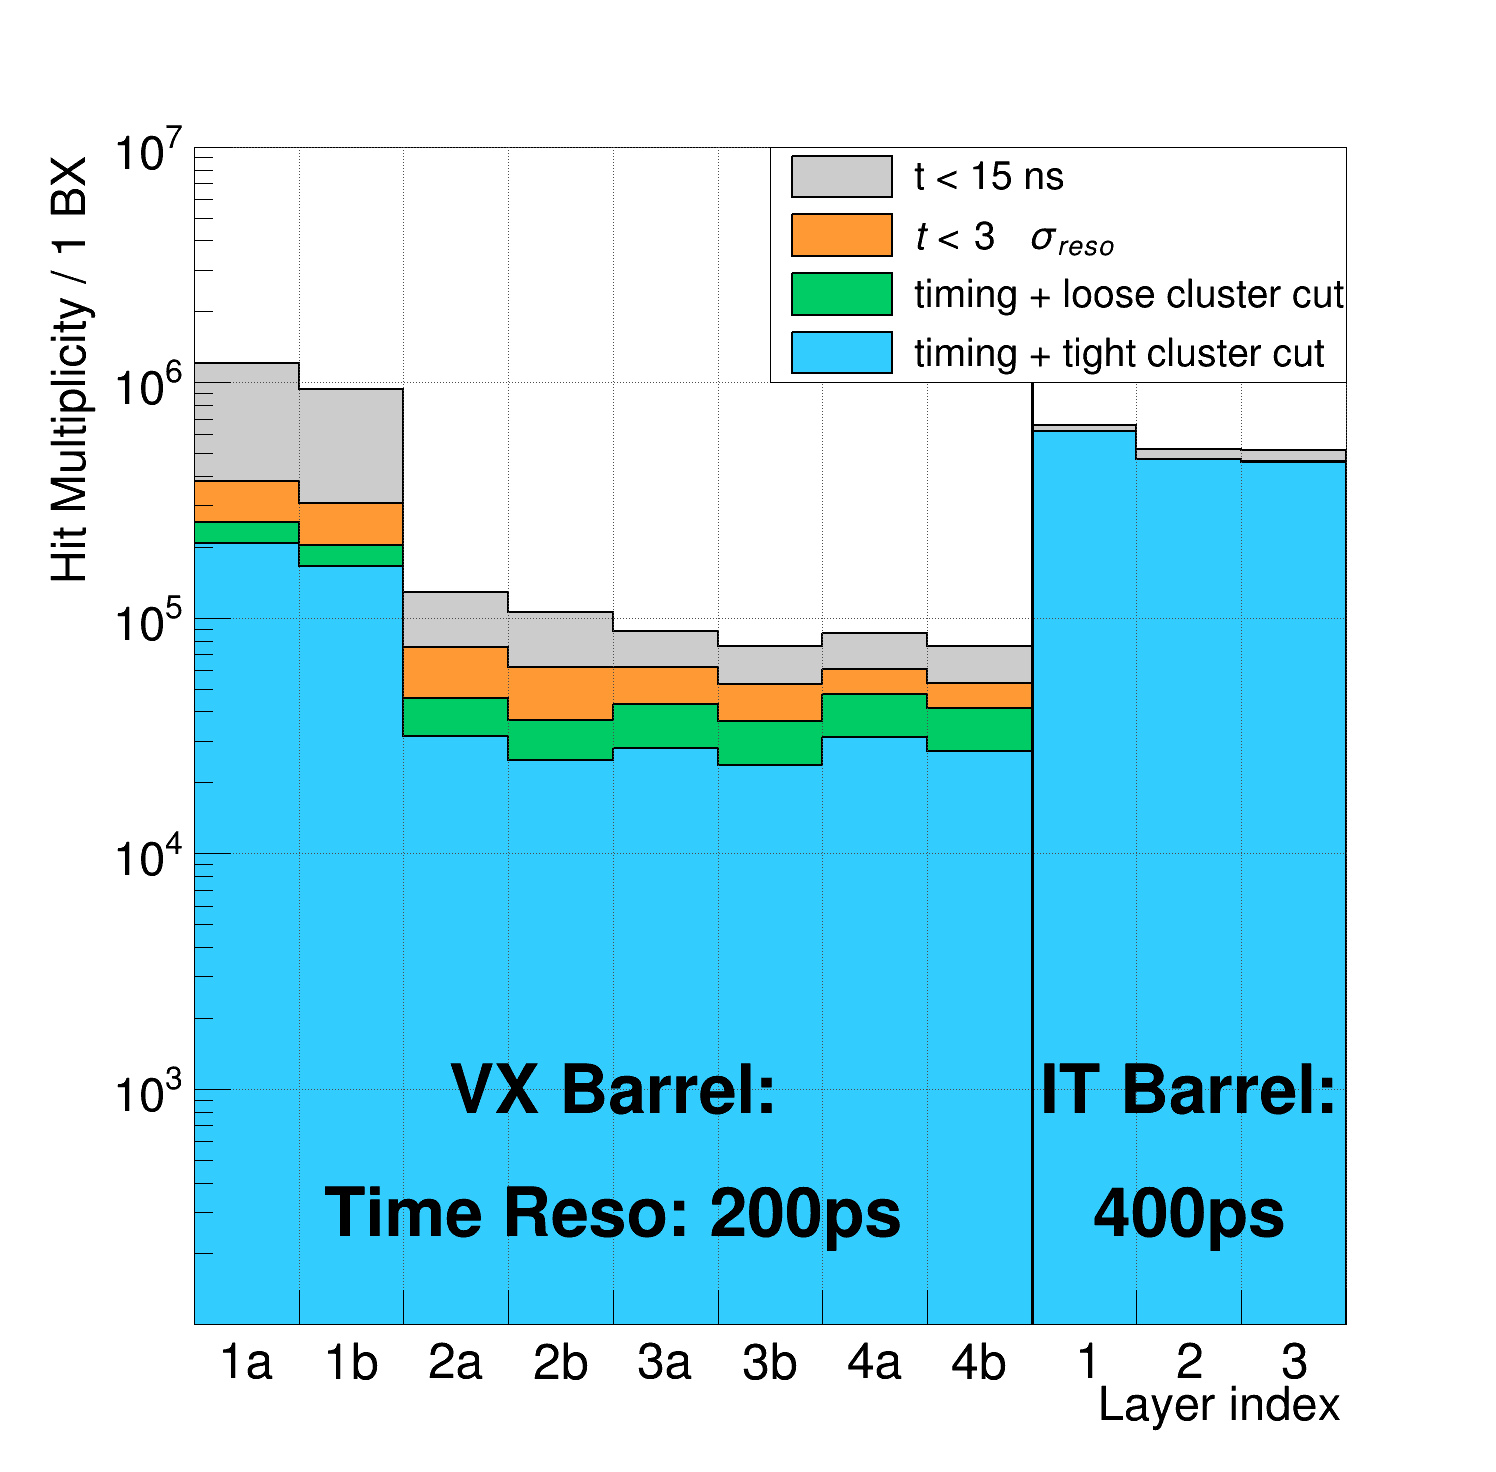

In [11]:
##########################################

# VXDBplots.py
# Imports local data from output root files and extracts contents to create a plot
# June 27, 2023
# Chris Sellgren, UCSB/LBNL/IRIS-HEP

##########################################

import ROOT as R
import math
import os
import numpy as np

R.gStyle.SetOptStat(0)
R.gStyle.SetGridColor(14)
R.gStyle.SetPadRightMargin(0.03)
R.gStyle.SetPadLeftMargin(0.12)

# hard coded values for the sensor layer areas
sens_area = {}
for sub in range(2):
    sens_area.update({('b',l*2+sub): 1e-2*130*a for l, a in enumerate([16*13,15*23,21*24,29*24])})

sens_area_ib = {}
sens_area_ib.update({('b',l): a for l, a in enumerate([8117.85,22034.16,51678.81])})

TIMES = ["30ps","50ps","75ps","100ps","150ps","200ps"]
#TIMES = ["30ps"]
TIMES_IT = ["60ps","100ps","150ps","200ps","300ps","400ps"]

vx_tothits = []
it_tothits = []

for iT,time in enumerate(TIMES):
    
    # set canvas
    C = R.TCanvas('canvas','',1500,1500)
    # R.gStyle.SetPalette(R.kBird)
    C.SetLeftMargin(0.13)
    C.SetRightMargin(0.1)
    C.SetGrid(1,1)

    # pull files from local drive
    STUDY_NAME = "originalgeo"
    TIME = time
    TIME_IT = TIMES_IT[iT]
    DIR_IN = '/Users/chris/Desktop/MC/data/myruns_vxdbstudy/' + STUDY_NAME 
    DIR_OUT = '/Users/chris/Desktop/MC/plots/digi_timing_studies'
    NAMES = ['notimingcut','timingcut','loosecluster','tightcluster']
    NAMES = [NAMES[I] + "_"+TIME for I in range(len(NAMES))]
    files_in = [R.TFile(os.path.join(DIR_IN,f'histograms_{n}.root')) for n in NAMES]

    # extract contents from files
    nH = len(NAMES)
    histos_vb = [files_in[i].MyTrackPerf.clusters_vb.numhits_by_layer for i in range(nH)]
    histos_ib = [files_in[i].MyTrackPerf.clusters_ib.numhits_by_layer for i in range(nH)]
    
    # get occupancy data from the histos
    numhits_vx_nocut = 0
    numhits_it_nocut = 0
    numhits_vx_tcut  = 0
    numhits_it_tcut  = 0
    # total hits, vertex
    for l in range(8):
        # no cut
        numhits = histos_vb[0].GetBinContent(l+1)
        numhits_vx_nocut += numhits
        # timing cut
        numhits_cut = histos_vb[1].GetBinContent(l+1)
        numhits_vx_tcut += numhits_cut
    #IT
    for l in range(3): 
        # no cut
        numhits = histos_ib[0].GetBinContent(l+1)
        numhits_it_nocut += numhits
        # timing cut
        numhits_cut = histos_ib[1].GetBinContent(l+1)
        numhits_it_tcut += numhits_cut
    # add to total vectors
    vx_tothits.append([numhits_vx_nocut,numhits_vx_tcut])
    it_tothits.append([numhits_it_nocut,numhits_it_tcut])
    
    # make larger histograms that combine content
    histos = [R.TH1F(f'h{i:d}', ';Layer;Hit density [cm^{-2}]', 16, 0, 16) for i in range(nH)]
    nhits_ib = []
    for i,h in enumerate(histos_ib):
        nhits_ib.append(np.sum([histos_ib[i].GetBinContent(j) for j in range(histos_ib[i].GetNbinsX())]))
        # noramlize by sensor area, shift bins by 8.
        for l in range(3):
            histos[i].SetBinContent(l+9, h.GetBinContent(l+1))
            h.SetBinContent(l+1, 0)
    nhits_vx = []
    for iH, h in enumerate(histos_vb):
        h.Draw()
        
        nhits_vx.append(np.sum([histos_vb[iH].GetBinContent(i+1) for i in range(histos_vb[iH].GetNbinsX())]))

        # noramlize by sensor area
        for l in range(8):
            h.SetBinContent(l+9, 0)
            h.SetBinContent(l+1, h.GetBinContent(l+1))

        h.Add(histos[iH])
        
    print(nhits_vx)
    print(nhits_ib)
    print([nhits_vx[i] + nhits_ib[i] for i in range(4)])


    # make plot
    names = [
        't < 15 ns',
        't < 3{$\sigma_{reso}$}',
        'timing + loose cluster cut',
        'timing + tight cluster cut',
    ]

    R.gStyle.SetGridColor(12)
    C.Clear()
    C.cd()
    C.SetGrid(1)

    leg = R.TLegend(0.515, 0.74, 0.9, 0.9)
    colors = [12, R.kAzure+2, R.kPink+2, R.kAzure+7, R.kTeal+2]
    fills = [17,R.kOrange+1, R.kTeal+2, R.kAzure+8] # R.kOrange+1, R.kTeal+2
    # colors = [1, 11, 15]
    # fills = [0, 12, 16]
    yMax = 1e4
    #h_ax = R.TH1F('h_ax', ';Layer index;Hit density [cm^{-2}]', 11, 0, 11)
    h_ax = R.TH1F('h_ax', ';Layer index;Hit Multiplicity / 1 BX', 11, 0, 11)
    #h_ax.GetYaxis().SetMaxDigits(4)
    C.SetLogy(True)
    h_ax.SetAxisRange(100, 1e7, 'Y')
    # Optimising the X axis
    a = h_ax.GetXaxis()
    #a.SetNdivisions(-208)
    # Drawing the axes
    h_ax.Draw('AXIS')
    h_ax.Draw('AXIG same')
    # Drawing
    for iT, h in enumerate(histos_vb):
        h.SetLineColor(1)
        h.SetFillColor(fills[iT])
        h.SetLineWidth(2)
        leg_type = 'F'
        leg.AddEntry(h, names[iT], leg_type)
        h.Draw('HIST same')
    h_ax.Draw('AXIG same')
    leg.Draw()
    xlabels = ["1a","1b","2a","2b","3a","3b","4a","4b","1","2","3"]
    for i,label in enumerate(xlabels):
        h_ax.GetXaxis().SetBinLabel(i+1, label)
    h_ax.GetXaxis().SetLabelSize(0.055)
    C.Draw()
    C.RedrawAxis()
    # Drawing text labels
    t1 = R.TText(4, 1000, 'VX Barrel:')
    t3 = R.TText(4, 300, 'Time Reso: '+TIME)
    
    t2 = R.TText(9.5, 1000, 'IT Barrel:')
    t4 = R.TText(9.5, 300, TIME_IT)

    for t in [t1,t2,t3,t4]:
        t.SetTextAlign(22)
        t.SetTextColor(1)
        t.Draw()

    # Drawing vertical separator
    l = R.TLine(8, 0, 8, 1e6)
    l.SetLineWidth(3)
    l.SetLineColor(1)
    l.Draw()
    C.SaveAs(os.path.join(DIR_OUT,STUDY_NAME+"totalmult_"+TIME+".png"))

print(vx_tothits,it_tothits)

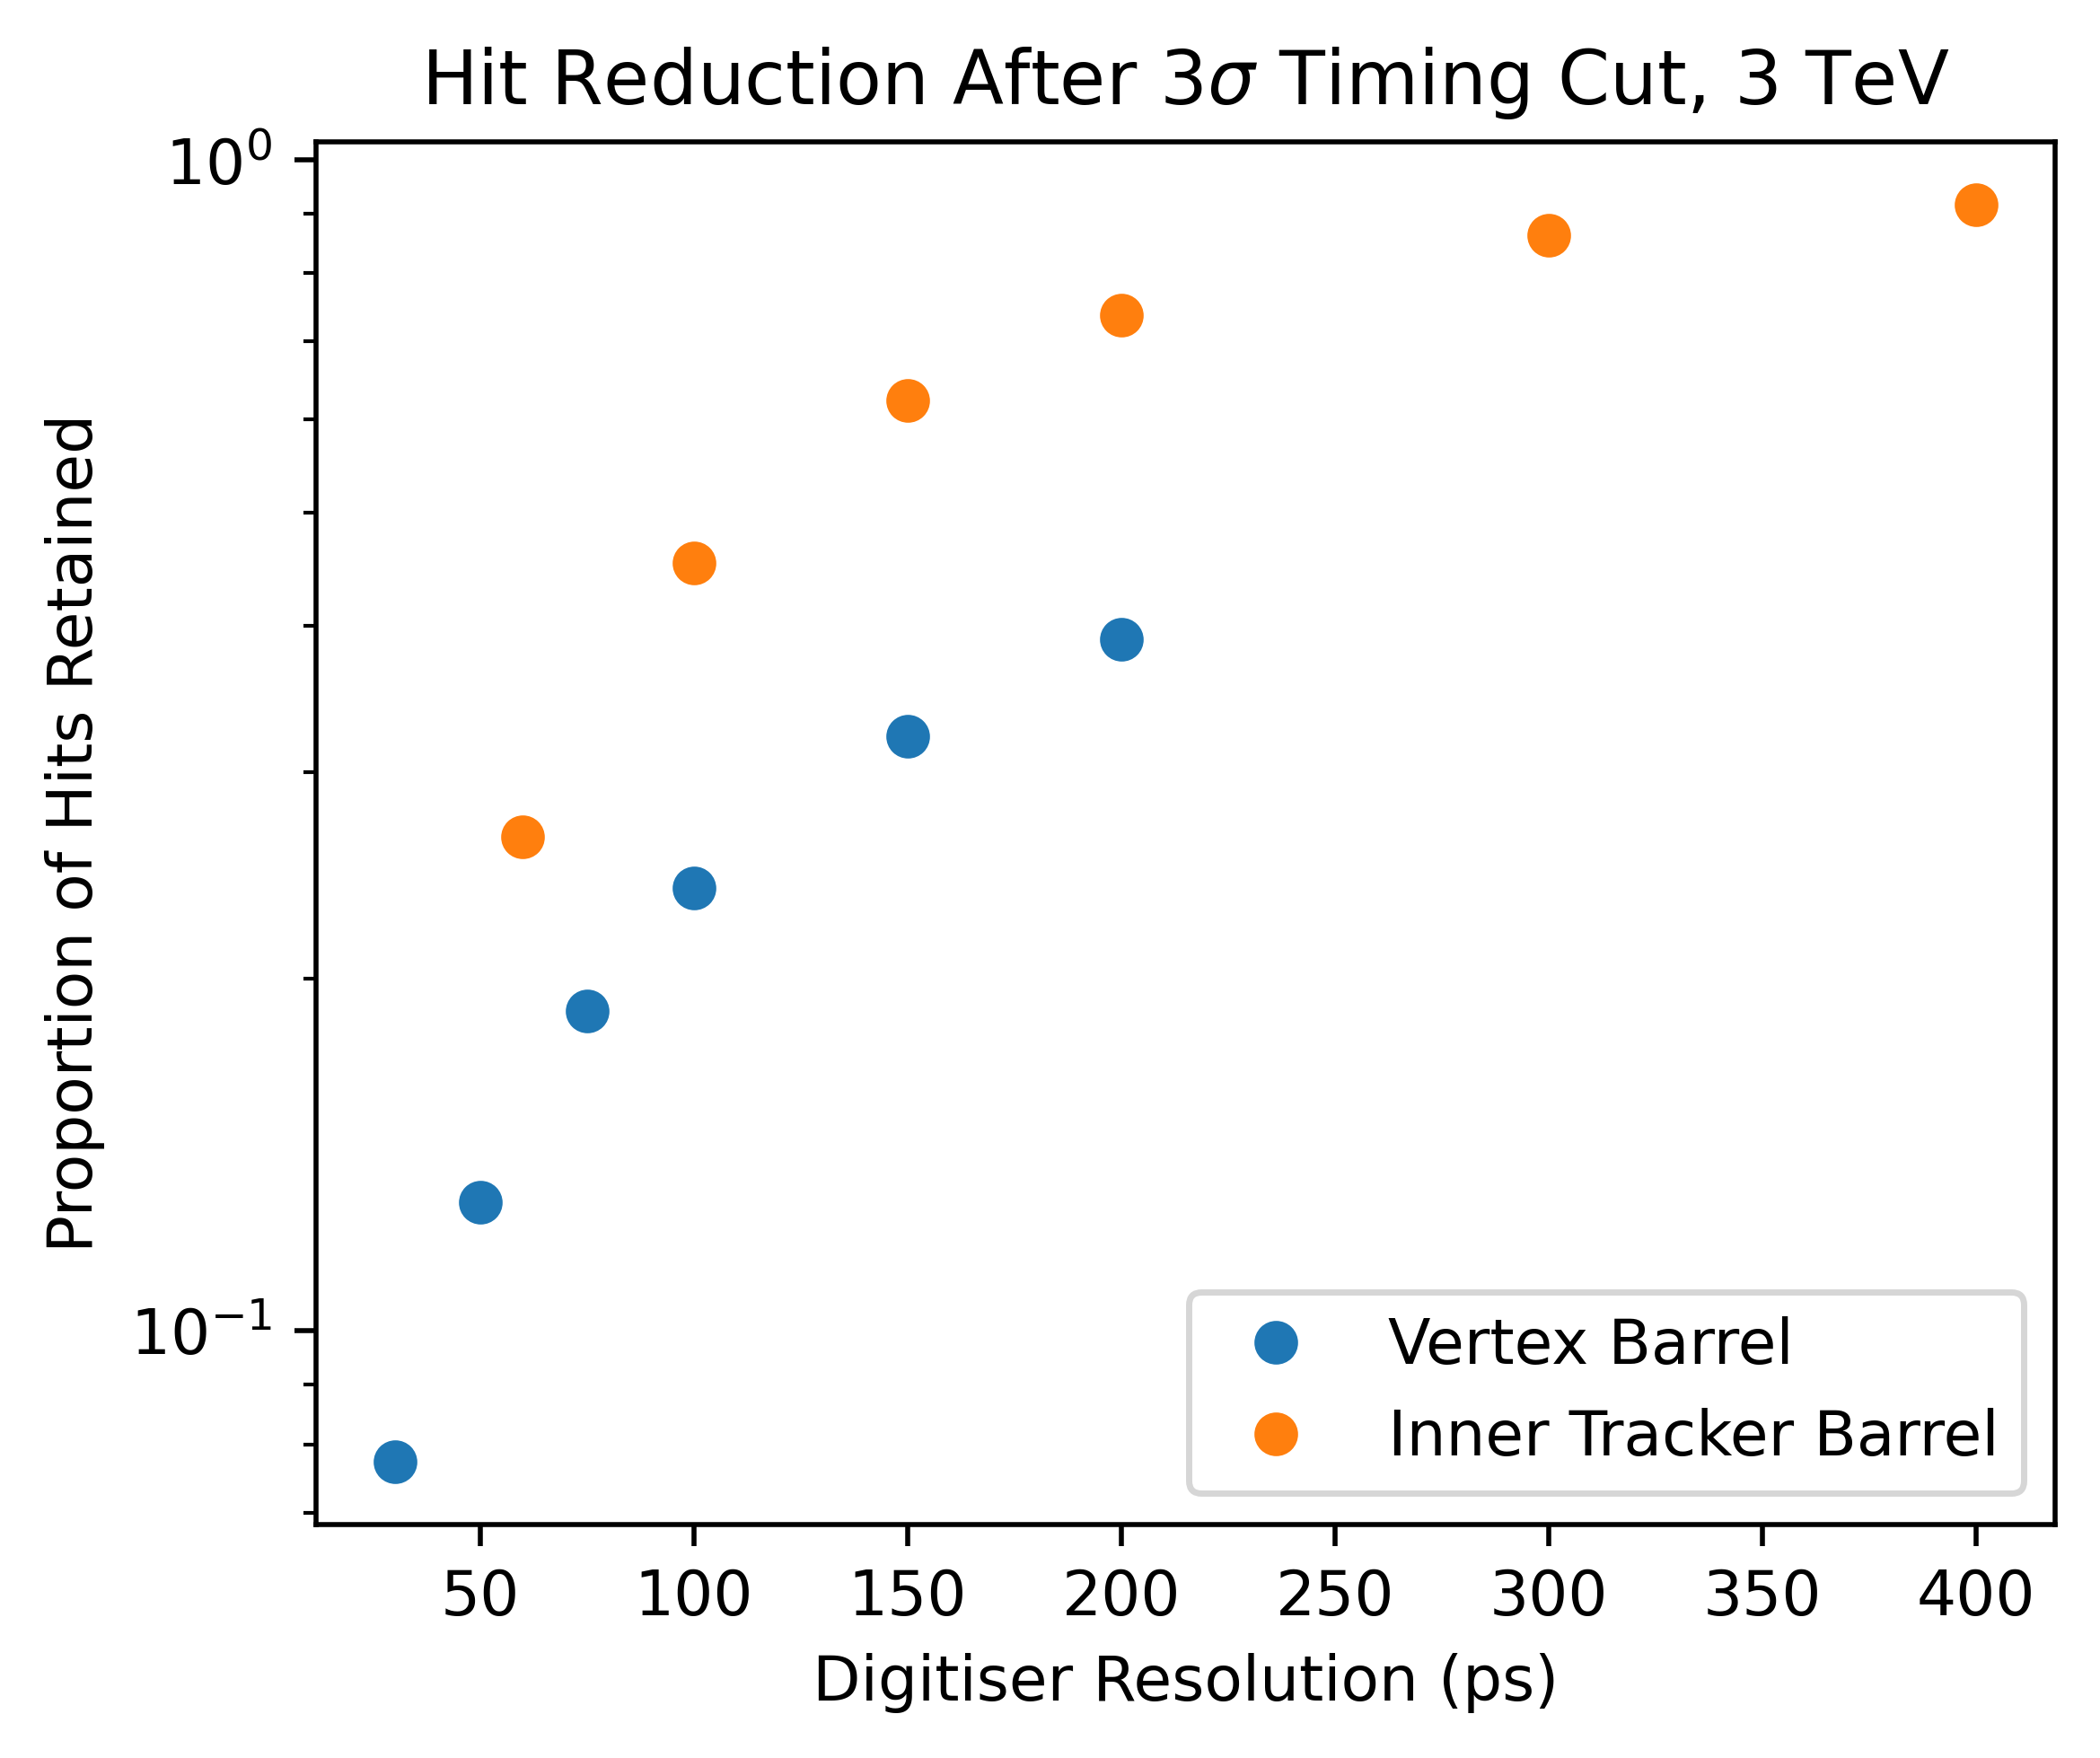

In [7]:
times = [30,50,75,100,150,200]
reduction_vx = [vx_tothits[i][1]/vx_tothits[i][0] for i in range(len(times))]
reduction_it = [it_tothits[i][1]/it_tothits[i][0] for i in range(len(times))]
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4),dpi=500)
plt.plot(times,reduction_vx,'o',label='Vertex Barrel')
plt.plot([times[i]*2 for i in range(len(times))],reduction_it,'o',label='Inner Tracker Barrel')
plt.xlabel("Digitiser Resolution (ps)")
plt.title(r"Hit Reduction After 3$\sigma$ Timing Cut, 3 TeV")
plt.ylabel("Proportion of Hits Retained")
plt.legend()
plt.yscale('log')
plt.savefig("/Users/chris/Desktop/MC/plots/digi_timing_studies/reductionfactorvstimereso_log.png")

/var/folders/9d/rmnl0d9n3wx3lkqxc1zjj8n80000gn/T/ipykernel_37998/3594667754.py:79: RuntimeWarning: invalid value encountered in scalar divide
  ib_perc = [sum_ib[i]/sum_ib[0]*100 for i in range(4)]


30ps
[8796.275085449219, 625.3428821563721, 338.488205909729, 236.51154899597168]
[100.0, 7.10917832925454, 3.8480857251685494, 2.6887693563291197]
50ps
[8796.275085449219, 1025.5102672576904, 561.224588394165, 394.69530057907104]
[100.0, 11.658460624476007, 6.380252810903353, 4.487073184329754]
75ps
[8796.275085449219, 1480.6974906921387, 843.4389610290527, 608.9219455718994]
[100.0, 16.83323311638475, 9.588592362513399, 6.9224977579336615]
100ps
[8796.275085449219, 1876.493553161621, 1124.4514083862305, 837.1331825256348]
[100.0, 21.33282025553877, 12.783267888544048, 9.516905444560491]
150ps
[8796.275085449219, 2528.845245361328, 1619.9716796875, 1253.8772411346436]
[100.0, 28.749046849893755, 18.416564556595713, 14.254638798288664]
200ps
[8796.275085449219, 3093.502769470215, 2052.175449371338, 1620.2433395385742]
[100.0, 35.168326813556355, 23.33005083897436, 18.41965290761288]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TCanvas::Print>: png file /Users/chris/Desktop/MC/plots/digi_timing_studies/originalgeodensity_30ps.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::

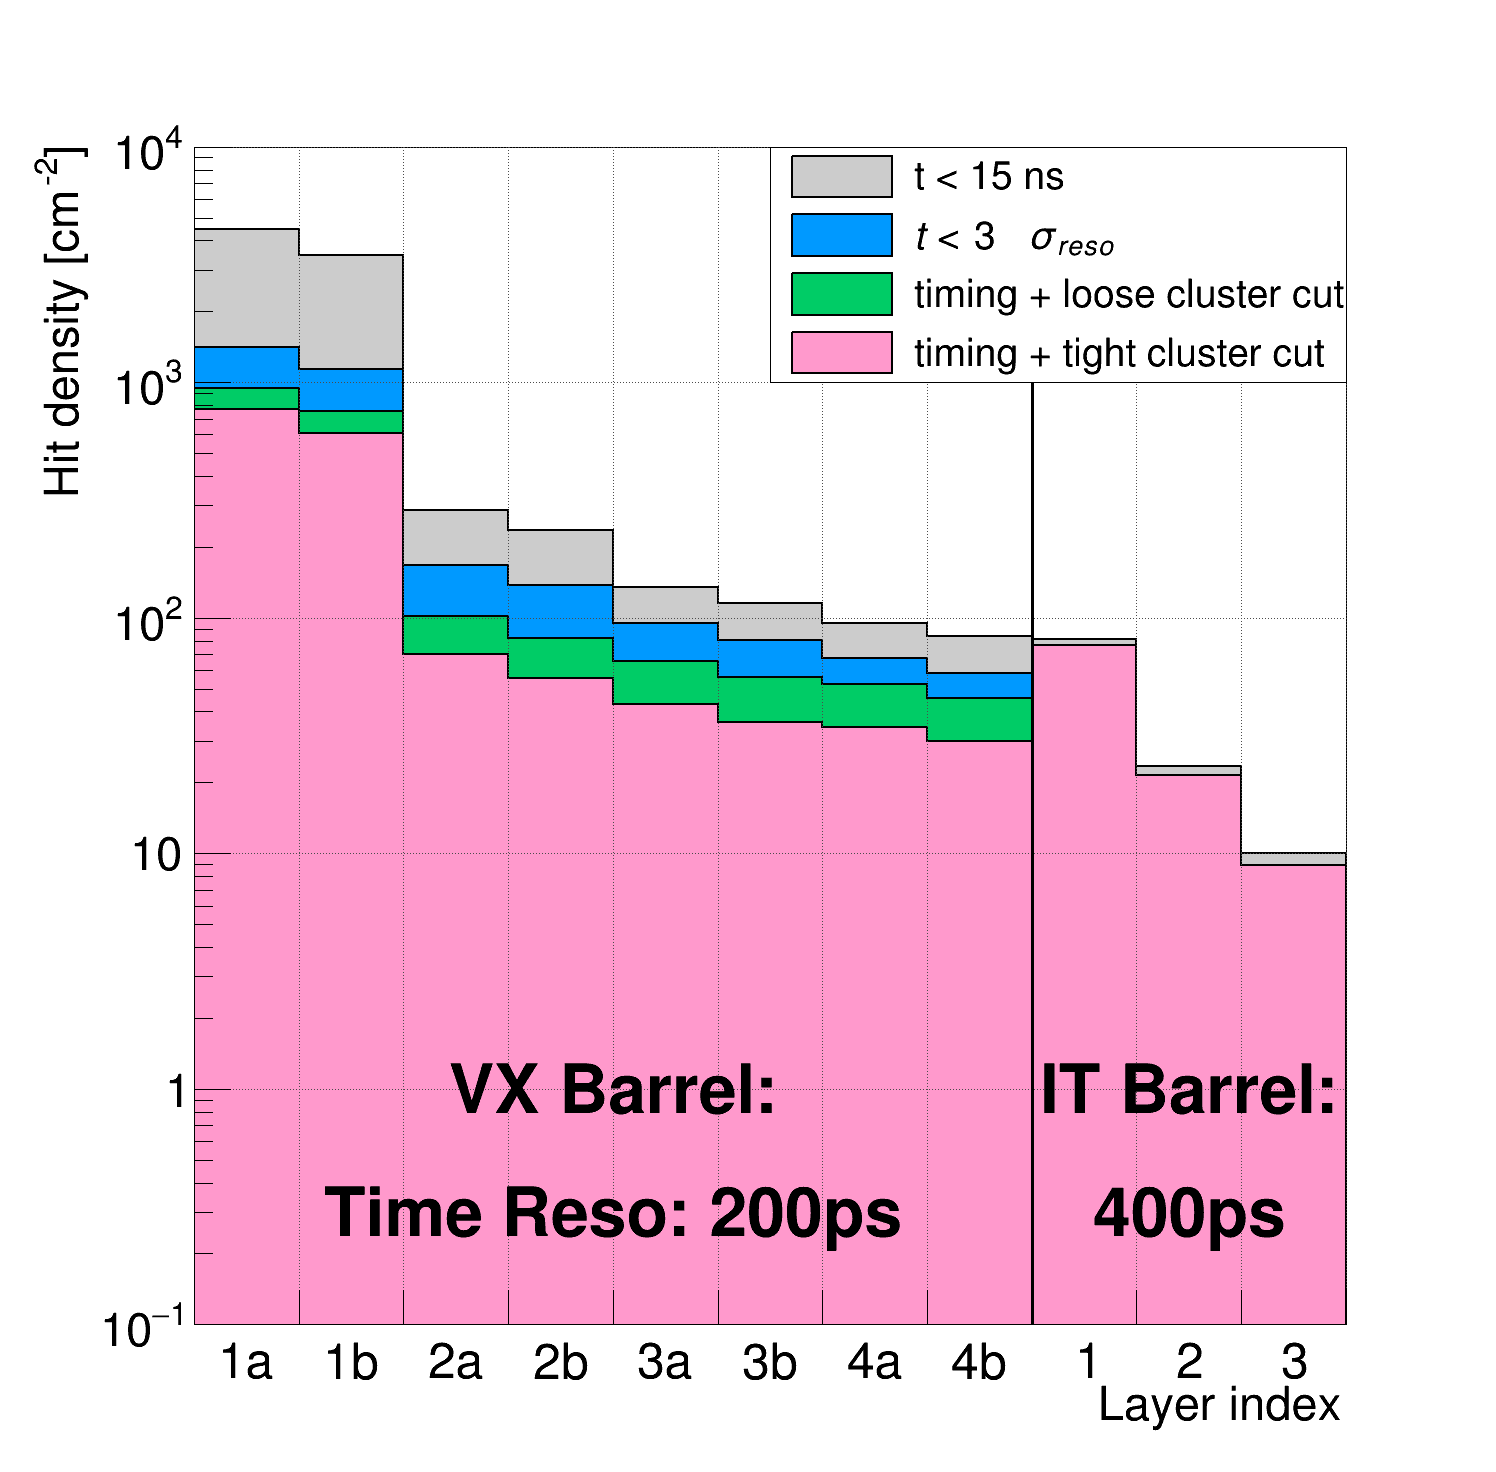

In [30]:
for iT,time in enumerate(TIMES):
    
    # set canvas
    C = R.TCanvas('canvas','',1500,1500)
    # R.gStyle.SetPalette(R.kBird)
    C.SetLeftMargin(0.13)
    C.SetRightMargin(0.1)
    C.SetGrid(1,1)

    # pull files from local drive
    STUDY_NAME = "originalgeo"
    TIME = time
    TIME_IT = TIMES_IT[iT]
    DIR_IN = '/Users/chris/Desktop/MC/data/myruns_vxdbstudy/' + STUDY_NAME 
    DIR_OUT = '/Users/chris/Desktop/MC/plots/digi_timing_studies'
    NAMES = ['notimingcut','timingcut','loosecluster','tightcluster']
    NAMES = [NAMES[I] + "_"+TIME for I in range(len(NAMES))]
    files_in = [R.TFile(os.path.join(DIR_IN,f'histograms_{n}.root')) for n in NAMES]

    # extract contents from files
    nH = len(NAMES)
    histos_vb = [files_in[i].MyTrackPerf.clusters_vb.numhits_by_layer for i in range(nH)]
    histos_ib = [files_in[i].MyTrackPerf.clusters_ib.numhits_by_layer for i in range(nH)]
    
    # get occupancy data from the histos
    numhits_vx_nocut = 0
    numhits_it_nocut = 0
    numhits_vx_tcut  = 0
    numhits_it_tcut  = 0
    # total hits, vertex
    for l in range(8):
        # no cut
        numhits = histos_vb[0].GetBinContent(l+1)
        numhits_vx_nocut += numhits
        # timing cut
        numhits_cut = histos_vb[1].GetBinContent(l+1)
        numhits_vx_tcut += numhits_cut
    #IT
    for l in range(3): 
        # no cut
        numhits = histos_ib[0].GetBinContent(l+1)
        numhits_it_nocut += numhits
        # timing cut
        numhits_cut = histos_ib[1].GetBinContent(l+1)
        numhits_it_tcut += numhits_cut
    # add to total vectors
    vx_tothits.append([numhits_vx_nocut,numhits_vx_tcut])
    it_tothits.append([numhits_it_nocut,numhits_it_tcut])
    
    # make larger histograms that combine content
    histos = [R.TH1F(f'h{i:d}', ';Layer;Hit density [cm^{-2}]', 16, 0, 16) for i in range(nH)]
    nhits_ib = []
    for i,h in enumerate(histos_ib):
        nhits_ib.append(np.sum([histos_ib[i].GetBinContent(j) for j in range(histos_ib[i].GetNbinsX())]))
        # noramlize by sensor area, shift bins by 8.
        for l in range(3):
            histos[i].SetBinContent(l+9, h.GetBinContent(l+1) / sens_area_ib[('b',l)])
            h.SetBinContent(l+1, 0)
    nhits_vx = []
    for iH, h in enumerate(histos_vb):
        h.Draw()
        
        nhits_vx.append(np.sum([histos_vb[iH].GetBinContent(i+1) for i in range(histos_vb[iH].GetNbinsX())]))

        # noramlize by sensor area
        for l in range(8):
            h.SetBinContent(l+9, 0)
            h.SetBinContent(l+1, h.GetBinContent(l+1) / sens_area[('b',l)])

        h.Add(histos[iH])
        
    #print(nhits_vx)
    #print(nhits_ib)
    #print([nhits_vx[i] + nhits_ib[i] for i in range(4)])
    sum_vb = [np.sum([h.GetBinContent(b) for b in range(8)]) for h in histos_vb]
    sum_ib = [np.sum([h.GetBinContent(b) for b in range(8)]) for h in histos_ib]
    sum_tot = [sum_vb[i] + sum_ib[i] for i in range(4)]
    vb_perc = [sum_vb[i]/sum_vb[0]*100 for i in range(4)]
    ib_perc = [sum_ib[i]/sum_ib[0]*100 for i in range(4)]
    tot_perc = [sum_tot[i]/sum_tot[0]*100 for i in range(4)]
    print(TIME)
    print(sum_vb)
    print(vb_perc)
    #print(sum_ib)
    #print(ib_perc)
    #print(sum_tot)
    #print(tot_perc)


    # make plot
    names = [
        't < 15 ns',
        't < 3{$\sigma_{reso}$}',
        'timing + loose cluster cut',
        'timing + tight cluster cut',
    ]

    R.gStyle.SetGridColor(12)
    C.Clear()
    C.cd()
    C.SetGrid(1)

    leg = R.TLegend(0.515, 0.74, 0.9, 0.9)
    colors = [12, R.kAzure+2, R.kPink+2, R.kAzure+7, R.kTeal+2]
    fills = [17,R.kOrange+1, R.kTeal+2, R.kAzure+8] # R.kOrange+1, R.kTeal+2
    fills = [17,R.kAzure+7, R.kTeal+2, R.kPink+1]
    # colors = [1, 11, 15]
    # fills = [0, 12, 16]
    yMax = 1e4
    h_ax = R.TH1F('h_ax', ';Layer index;Hit density [cm^{-2}]', 11, 0, 11)
    #h_ax = R.TH1F('h_ax', ';Layer index;Hit Multiplicity / 1 BX', 11, 0, 11)
    #h_ax.GetYaxis().SetMaxDigits(4)
    C.SetLogy(True)
    h_ax.SetAxisRange(1e-1, 1e4, 'Y')
    # Optimising the X axis
    a = h_ax.GetXaxis()
    #a.SetNdivisions(-208)
    # Drawing the axes
    h_ax.Draw('AXIS')
    h_ax.Draw('AXIG same')
    # Drawing
    for iT, h in enumerate(histos_vb):
        h.SetLineColor(1)
        h.SetFillColor(fills[iT])
        h.SetLineWidth(2)
        leg_type = 'F'
        leg.AddEntry(h, names[iT], leg_type)
        h.Draw('HIST same')
    h_ax.Draw('AXIG same')
    leg.Draw()
    xlabels = ["1a","1b","2a","2b","3a","3b","4a","4b","1","2","3"]
    for i,label in enumerate(xlabels):
        h_ax.GetXaxis().SetBinLabel(i+1, label)
    h_ax.GetXaxis().SetLabelSize(0.055)
    C.Draw()
    C.RedrawAxis()
    # Drawing text labels
    t1 = R.TText(4, 1, 'VX Barrel:')
    t3 = R.TText(4, 3e-1, 'Time Reso: '+TIME)
    
    t2 = R.TText(9.5, 1, 'IT Barrel:')
    t4 = R.TText(9.5, 3e-1, TIME_IT)

    for t in [t1,t2,t3,t4]:
        t.SetTextAlign(22)
        t.SetTextColor(1)
        t.Draw()

    # Drawing vertical separator
    l = R.TLine(8, 0, 8, 1e3)
    l.SetLineWidth(3)
    l.SetLineColor(1)
    l.Draw()
    C.SaveAs(os.path.join(DIR_OUT,STUDY_NAME+"density_"+TIME+".png"))

# Make single plot for just vertex barrel

/var/folders/9d/rmnl0d9n3wx3lkqxc1zjj8n80000gn/T/ipykernel_37998/1874047106.py:79: RuntimeWarning: invalid value encountered in scalar divide
  ib_perc = [sum_ib[i]/sum_ib[0]*100 for i in range(4)]
/var/folders/9d/rmnl0d9n3wx3lkqxc1zjj8n80000gn/T/ipykernel_37998/1874047106.py:152: RuntimeWarning: invalid value encountered in scalar divide
  ib_perc = [sum_ib[i]/sum_ib[0]*100 for i in range(4)]
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Error in <TAxis::SetBinLabel>: Illegal bin number: 9
Error in <TAxis::SetBinLabel>: Illegal bin number: 10
Error 

[8796.275085449219, 625.3428821563721, 338.488205909729, 236.51154899597168]
[100.0, 7.10917832925454, 3.8480857251685494, 2.6887693563291197]
[0.0, 0.0, 0.0, 0.0]
[nan, nan, nan, nan]
[8796.275085449219, 625.3428821563721, 338.488205909729, 236.51154899597168]
[100.0, 7.10917832925454, 3.8480857251685494, 2.6887693563291197]
[8796.275085449219, 625.3428821563721, 338.488205909729, 236.51154899597168]
[100.0, 7.10917832925454, 3.8480857251685494, 2.6887693563291197]
[0.0, 0.0, 0.0, 0.0]
[nan, nan, nan, nan]
[8796.275085449219, 625.3428821563721, 338.488205909729, 236.51154899597168]
[100.0, 7.10917832925454, 3.8480857251685494, 2.6887693563291197]


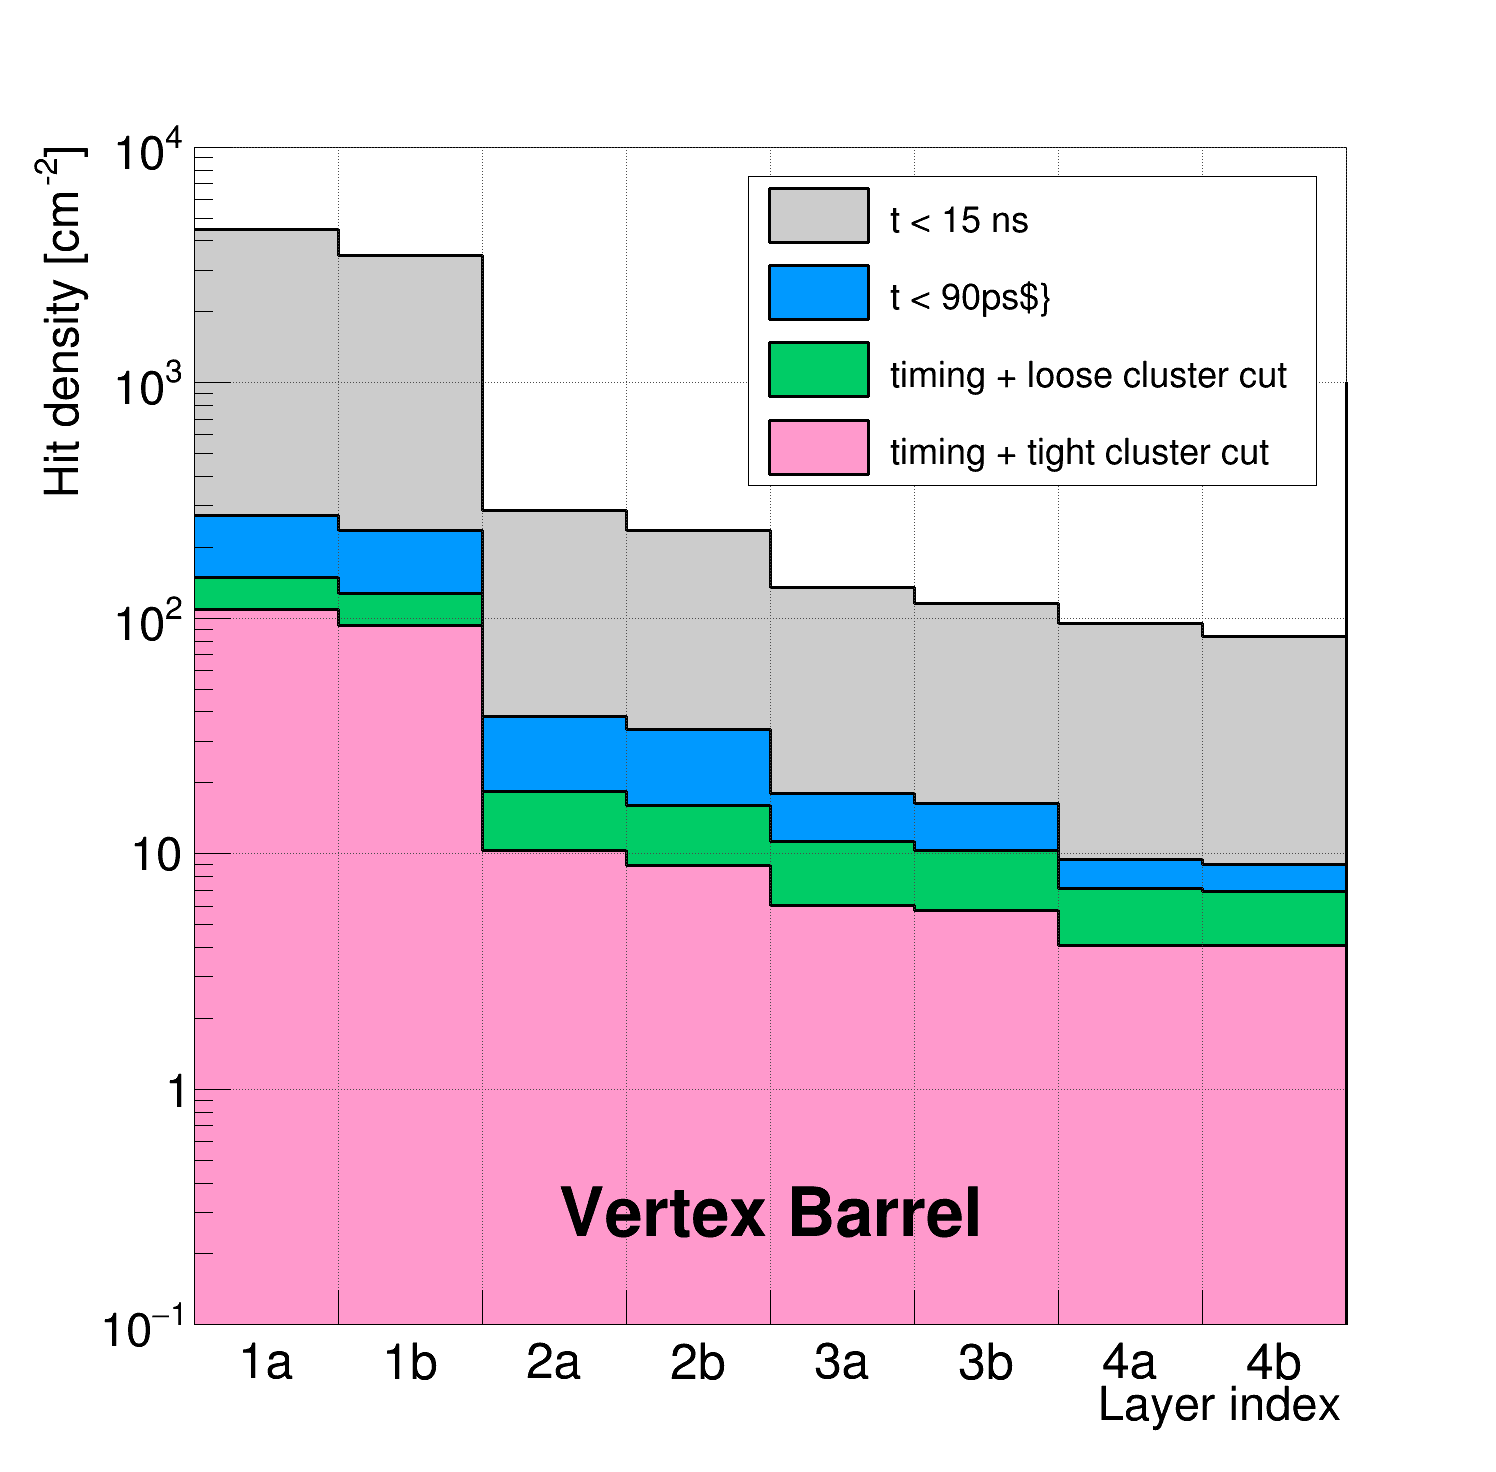

In [27]:
for iT,time in enumerate(["30ps"]):
    
    # set canvas
    C = R.TCanvas('canvas','',1500,1500)
    # R.gStyle.SetPalette(R.kBird)
    C.SetLeftMargin(0.13)
    C.SetRightMargin(0.1)
    C.SetGrid(1,1)

    # pull files from local drive
    STUDY_NAME = "originalgeo"
    TIME = time
    TIME_IT = TIMES_IT[iT]
    DIR_IN = '/Users/chris/Desktop/MC/data/myruns_vxdbstudy/' + STUDY_NAME 
    DIR_OUT = '/Users/chris/Desktop/MC/plots/digi_timing_studies'
    NAMES = ['notimingcut','timingcut','loosecluster','tightcluster']
    NAMES = [NAMES[I] + "_"+TIME for I in range(len(NAMES))]
    files_in = [R.TFile(os.path.join(DIR_IN,f'histograms_{n}.root')) for n in NAMES]

    # extract contents from files
    nH = len(NAMES)
    histos_vb = [files_in[i].MyTrackPerf.clusters_vb.numhits_by_layer for i in range(nH)]
    histos_ib = [files_in[i].MyTrackPerf.clusters_ib.numhits_by_layer for i in range(nH)]
    
    # get occupancy data from the histos
    numhits_vx_nocut = 0
    numhits_it_nocut = 0
    numhits_vx_tcut  = 0
    numhits_it_tcut  = 0
    # total hits, vertex
    for l in range(8):
        # no cut
        numhits = histos_vb[0].GetBinContent(l+1)
        numhits_vx_nocut += numhits
        # timing cut
        numhits_cut = histos_vb[1].GetBinContent(l+1)
        numhits_vx_tcut += numhits_cut
    #IT
    for l in range(3): 
        # no cut
        numhits = histos_ib[0].GetBinContent(l+1)
        numhits_it_nocut += numhits
        # timing cut
        numhits_cut = histos_ib[1].GetBinContent(l+1)
        numhits_it_tcut += numhits_cut
    # add to total vectors
    vx_tothits.append([numhits_vx_nocut,numhits_vx_tcut])
    it_tothits.append([numhits_it_nocut,numhits_it_tcut])
    
    # make larger histograms that combine content
    histos = [R.TH1F(f'h{i:d}', ';Layer;Hit density [cm^{-2}]', 16, 0, 16) for i in range(nH)]
    nhits_ib = []
    for i,h in enumerate(histos_ib):
        nhits_ib.append(np.sum([histos_ib[i].GetBinContent(j) for j in range(histos_ib[i].GetNbinsX())]))
        # noramlize by sensor area, shift bins by 8.
        for l in range(3):
            histos[i].SetBinContent(l+9, h.GetBinContent(l+1) / sens_area_ib[('b',l)])
            h.SetBinContent(l+1, 0)
    nhits_vx = []
    for iH, h in enumerate(histos_vb):
        h.Draw()
        
        nhits_vx.append(np.sum([histos_vb[iH].GetBinContent(i+1) for i in range(histos_vb[iH].GetNbinsX())]))

        # noramlize by sensor area
        for l in range(8):
            h.SetBinContent(l+9, 0)
            h.SetBinContent(l+1, h.GetBinContent(l+1) / sens_area[('b',l)])

        h.Add(histos[iH])
        
    #print(nhits_vx)
    #print(nhits_ib)
    #print([nhits_vx[i] + nhits_ib[i] for i in range(4)])
    sum_vb = [np.sum([h.GetBinContent(b) for b in range(8)]) for h in histos_vb]
    sum_ib = [np.sum([h.GetBinContent(b) for b in range(8)]) for h in histos_ib]
    sum_tot = [sum_vb[i] + sum_ib[i] for i in range(4)]
    vb_perc = [sum_vb[i]/sum_vb[0]*100 for i in range(4)]
    ib_perc = [sum_ib[i]/sum_ib[0]*100 for i in range(4)]
    tot_perc = [sum_tot[i]/sum_tot[0]*100 for i in range(4)]
    print(sum_vb)
    print(vb_perc)
    print(sum_ib)
    print(ib_perc)
    print(sum_tot)
    print(tot_perc)


    # make plot
    names = [
        't < 15 ns',
        't < 90ps$}',
        'timing + loose cluster cut',
        'timing + tight cluster cut',
    ]

    R.gStyle.SetGridColor(12)
    C.Clear()
    C.cd()
    C.SetGrid(1)
    C.SetLogy(True)
    leg = R.TLegend(0.515, 0.95, 0.515, 0.95)
    colors = [12, R.kAzure+2, R.kPink+2, R.kAzure+7, R.kTeal+2]
    fills = [17,R.kOrange+1, R.kTeal+2, R.kAzure+8] # R.kOrange+1, R.kTeal+2
    fills = [17,R.kAzure+7, R.kTeal+2, R.kPink+1]
    # colors = [1, 11, 15]
    # fills = [0, 12, 16]
    yMax = 1e4
    h_ax = R.TH1F('h_ax', ';Layer index;Hit density [cm^{-2}]', 8, 0, 8)
    #h_ax = R.TH1F('h_ax', ';Layer index;Hit Multiplicity / 1 BX', 11, 0, 11)
    #h_ax.GetYaxis().SetMaxDigits(4)
    C.SetLogy(True)
    h_ax.SetAxisRange(1e-1, 1e4, 'Y')
    # Optimising the X axis
    a = h_ax.GetXaxis()
    #a.SetNdivisions(-208)
    # Drawing the axes
    h_ax.Draw('AXIS')
    h_ax.Draw('AXIG same')
    # Drawing
    for iT, h in enumerate(histos_vb):
        h.SetLineColor(1)
        h.SetFillColor(fills[iT])
        h.SetLineWidth(3)
        leg_type = 'F'
        leg.AddEntry(h, names[iT], leg_type)
        h.Draw('HIST same')
    h_ax.Draw('AXIG same')
    leg.Draw()
    xlabels = ["1a","1b","2a","2b","3a","3b","4a","4b","1","2","3"]
    for i,label in enumerate(xlabels):
        h_ax.GetXaxis().SetBinLabel(i+1, label)
    h_ax.GetXaxis().SetLabelSize(0.055)
    C.Draw()
    C.RedrawAxis()
    # Drawing text labels
    t1 = R.TText(4, 3e-1, 'Vertex Barrel')
    #t3 = R.TText(4, 3e-1, 'Time Reso: '+TIME)
    
    t2 = R.TText(9.5, 1, 'IT Barrel:')
    t4 = R.TText(9.5, 3e-1, TIME_IT)

    for t in [t1]:
        t.SetTextAlign(22)
        t.SetTextColor(1)
        t.Draw()
        
    sum_vb = [np.sum([h.GetBinContent(b) for b in range(8)]) for h in histos_vb]
    sum_ib = [np.sum([h.GetBinContent(b) for b in range(15)]) for h in histos_ib]
    sum_tot = [sum_vb[i] + sum_ib[i] for i in range(4)]
    vb_perc = [sum_vb[i]/sum_vb[0]*100 for i in range(4)]
    ib_perc = [sum_ib[i]/sum_ib[0]*100 for i in range(4)]
    tot_perc = [sum_tot[i]/sum_tot[0]*100 for i in range(4)]
    print(sum_vb)
    print(vb_perc)
    print(sum_ib)
    print(ib_perc)
    print(sum_tot)
    print(tot_perc)


    # Drawing vertical separator
    l = R.TLine(8, 0, 8, 1e3)
    l.SetLineWidth(3)
    l.SetLineColor(1)
    l.Draw()
    C.SaveAs("/Users/chris/Desktop/MC/plots/hitdensity_withclusters.png")

[0.0, 0.0, 0.0, 0.0]
[nan, nan, nan, nan]


/var/folders/9d/rmnl0d9n3wx3lkqxc1zjj8n80000gn/T/ipykernel_37998/1317818585.py:2: RuntimeWarning: invalid value encountered in scalar divide
  vb_perc = [sum_vb[i]/sum_vb[0]*100 for i in range(4)]
